#Titanic Kaggle Study

###1. Read Data

In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('kaggle/Titanic/data/train.csv')
test = pd.read_csv('kaggle/Titanic/data/test.csv')

###2. checkData

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##Age, Cabin, Embarked에 NAN이 있다. 
####Pclass 탄 등급, SibSP 같이 탄 사람, Parch 같이탄 부모님, 자식, Fare가격, Cabin 탄 공간, Embarked: 탑승한 공간

In [81]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. data enginnering

In [82]:
def makingBar(Feature):
    survivedData = train[train['Survived'] == 1][Feature].value_counts()
    dieData = train[train['Survived'] == 0][Feature].value_counts()
    df = pd.DataFrame([survivedData, dieData])
    df.index = ['Survived', 'Die']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [83]:
train_test_data = [train, test]

###3-2. sex Data 2 vector

In [84]:
sexMapping = {'male': 0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sexMapping)

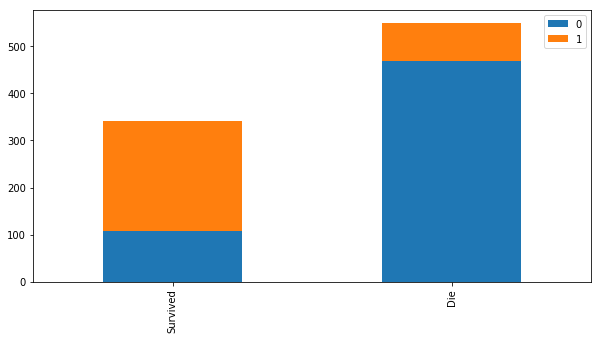

In [86]:
# 1==female, 0==male 
makingBar('Sex')

In [87]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [89]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Countess      1
Ms            1
Sir           1
Jonkheer      1
Don           1
Lady          1
Mme           1
Name: Title, dtype: int64

In [90]:
mappingTitle = {
    'Mr':0, 'Miss':1, 'Mrs':2, 
    'Master':3, 'Dr':3, 'Rev':3, 'Col':3, 'Major':3, 'Mlle':3, 'Ms':3, 'Capt':3, 'Jonkheer':3, 
    'Mme':3, 'Sir':3, 'Lady':3, 'Countess':3, 'Don':3
}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(mappingTitle)

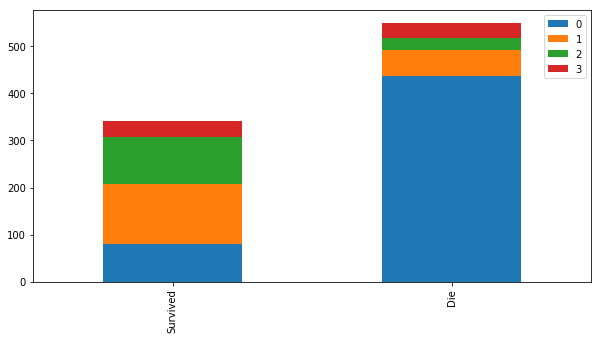

In [92]:
makingBar('Title')

In [94]:
#drop Name
train = train.drop(columns='Name')
test = test.drop(columns='Name')

KeyError: "['Name'] not found in axis"

In [95]:
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

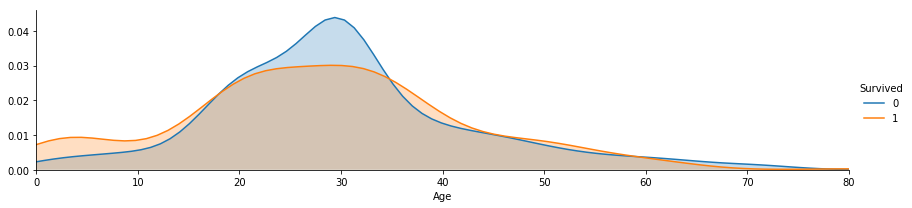

In [96]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

(0, 20)

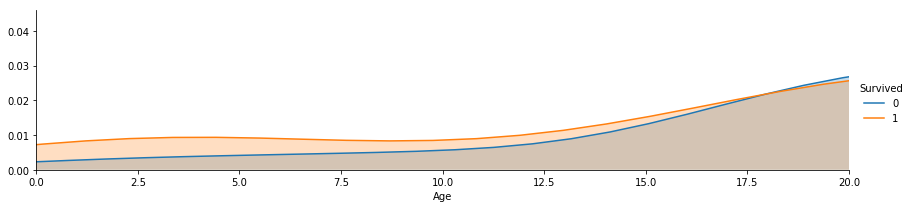

In [97]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20) # 0 ~ 16

(20, 40)

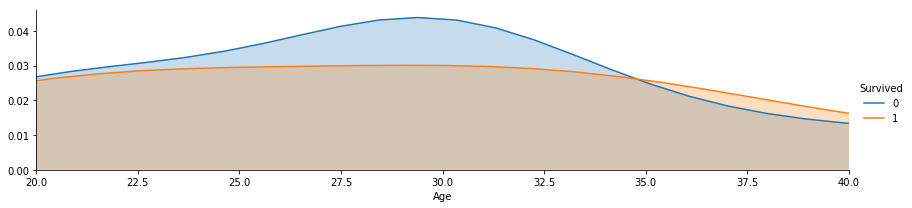

In [98]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)#16 ~ 35

(40, 60)

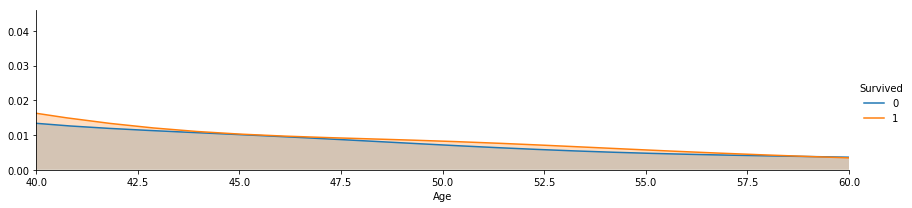

In [99]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)#35 ~ 47

(60, 80)

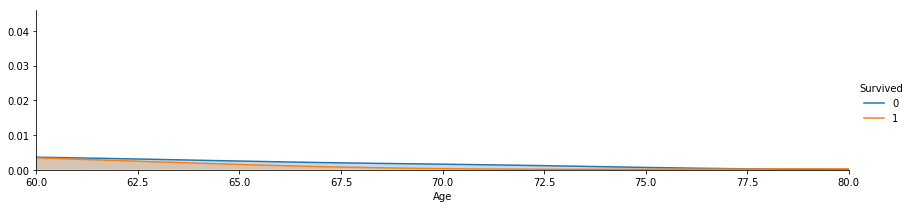

In [101]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)#47 ~ 60 60 ~

In [102]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[dataset['Age'] > 60, 'Age'] = 4

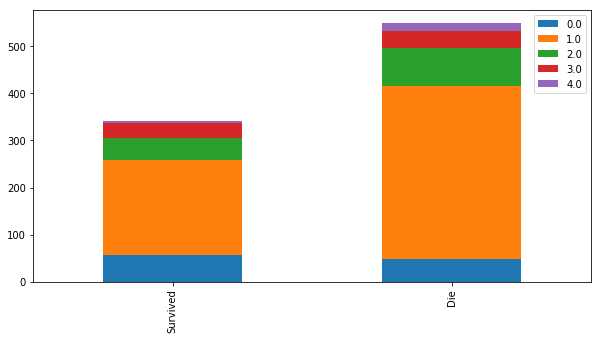

In [103]:
makingBar('Age')

In [105]:
train['Cabin'] = train['Cabin'].str[:1]

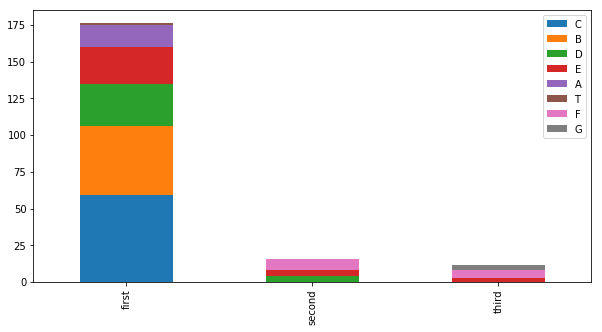

In [115]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['first', 'second', 'third']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [117]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2,
                 "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [118]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

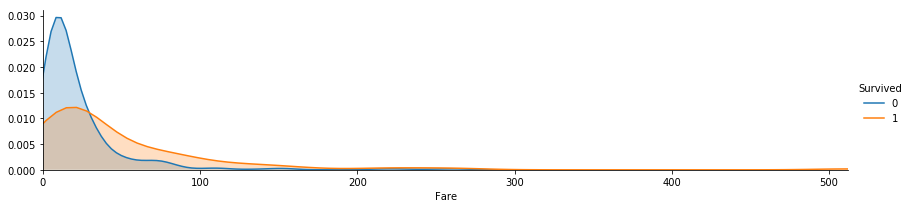

In [119]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

(0, 30)

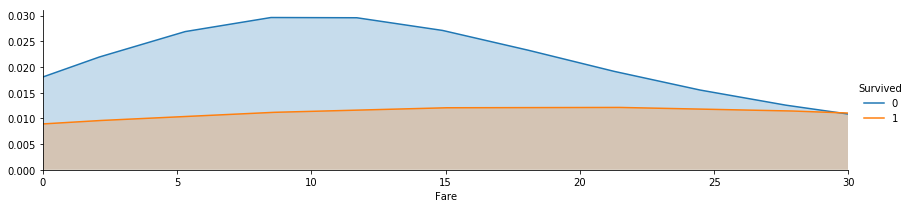

In [120]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30) #0 ~ 30 

(30, 60)

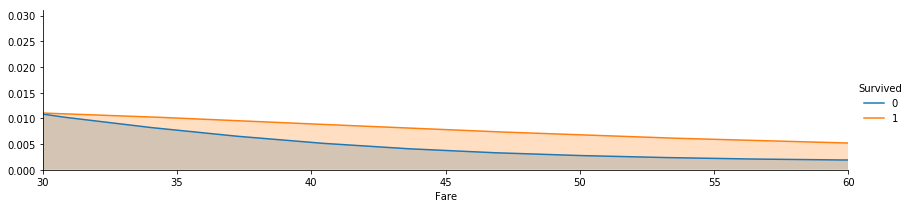

In [121]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(30, 60) #0 ~ 30 

(100, 200)

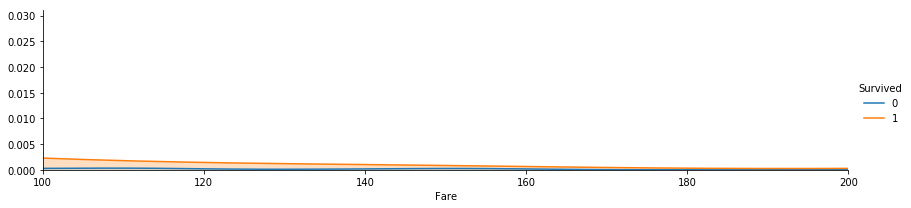

In [124]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(100, 200) #0 ~ 30

In [125]:
train['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,